# Bernstein-Vazirani Algorithm

With a given number, the algorithm creates a quantum circuit and places not gates with respect to the position of the each 1 in the number. 1 and 0 in this case represents a bit or, more preciscly, a quibit. Using a simulator we get perfect results from an isolated environment and we get that all 100,000 times the circuit ran, it returned our number. Using IBMs quantum computer, which is in an open environment, we get all kinds of numbers. Note that our number was the one that we got as the result most frequently.

This algorithm is in DevOps-moments because to us ordinary coders the algorithm looks extremely dumb by literally only spitting out the number it was given. And for IBM's own computers it even failed many many times. 

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [3]:
secretnumber = "1011"

In [4]:
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for count, value in enumerate(reversed(secretnumber)):
    if value == '1':
        circuit.cx(count,len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

In [5]:
circuit.draw()

┌───┐      ░                 ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░───■─────────────░─┤ H ├─░─┤M├─────────
     ├───┤      ░   │             ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░   │    │        ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───┼────┼────────░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────┼────■───░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════╩══╩══╩══╩═
                                             0  1  2  3

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator,shots=100000).result()
counts = result.get_counts()

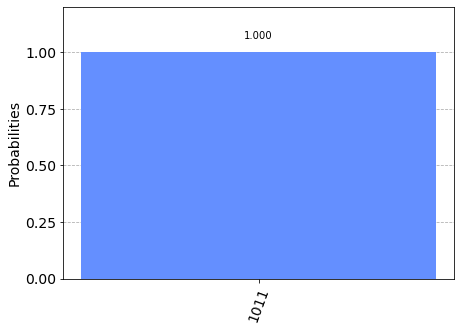

In [7]:
plot_histogram(counts)

In [8]:
from qiskit import IBMQ
# You have to make your own account and save you IBM account with IBMQ.save_account("<TOKEN>") on your own computer
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [10]:
provider = IBMQ.get_provider("ibm-q")
backend = provider.get_backend("ibmq_santiago")

In [11]:
job = execute(circuit, backend=backend,shots=1000)
job_monitor(job)

Job Status: job has successfully run


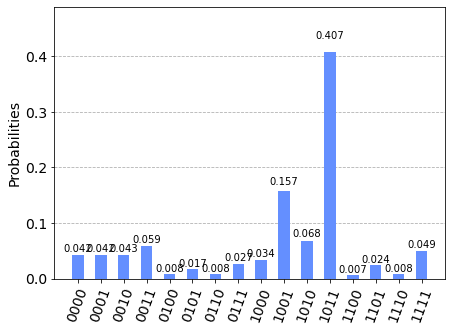

In [12]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])